In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\police.csv\police.csv")

In [32]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [33]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [69]:
#change stop_time and stop_date type to datetime
df['stop_time']=pd.to_datetime(df.stop_time)
df['stop_date']=pd.to_datetime(df.stop_date)

In [70]:
df.dtypes

stop_date             datetime64[ns]
stop_time             datetime64[ns]
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [71]:
#search conducted for each age group for male female
pd.pivot_table(df,index=['driver_gender','violation'],values=df.select_dtypes(include='number').columns,aggfunc='mean')

driver_age  driver_age_raw
driver_gender violation                                      
F             Equipment             31.521739     1978.642397
              Moving violation      33.954930     1972.106117
              Other                 33.969343     1962.591304
              Registration/plates   32.850791     1976.183613
              Seat belt             30.124409     1983.960630
              Speeding              32.529023     1974.767666
M             Equipment             31.857210     1977.442517
              Moving violation      36.653404     1966.953994
              Other                 40.620631     1912.469810
              Registration/plates   32.783023     1975.455974
              Seat belt             32.776867     1981.343116
              Speeding              34.000729     1972.413384

In [37]:
#min,max,average age of male and female for each violation
pd.pivot_table(df,index=['driver_gender','violation'],values=['driver_age'],aggfunc=['mean','min','max',len])

mean        min        max        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment            31.521739       16.0       89.0       2487
              Moving violation     33.954930       15.0       99.0       3204
              Other                33.969343       16.0       74.0        690
              Registration/plates  32.850791       16.0       72.0       1013
              Seat belt            30.124409       17.0       71.0        635
              Speeding             32.529023       16.0       84.0      15482
M             Equipment            31.857210       16.0       85.0       8533
              Moving violation     36.653404       15.0       94.0      13020
              Other                40.620631       16.0       87.0       3627
              Registration/plates  32.783023       16.0       74.0       2419
              Seat belt            32.776867       17.0       77.0       2317
              Speeding             34.000729       15.0       90.0      32979

In [72]:
#how many people were arrested on each date
df.groupby('stop_date').is_arrested.value_counts()

stop_date   is_arrested
2005-01-02  False           1
2005-01-18  False           1
2005-01-23  False           1
2005-02-20  True            1
2005-03-14  False           1
                           ..
2015-12-28  False          20
2015-12-29  False          12
2015-12-30  False          21
            True            1
2015-12-31  False          24
Name: count, Length: 5681, dtype: int64

In [73]:
#on which time police is more active
df['stop_time'].mean()

Timestamp('2025-10-19 12:08:17.488363520')

In [40]:
#how many male and females
df['driver_gender'].value_counts()

driver_gender
M    62895
F    23511
Name: count, dtype: int64

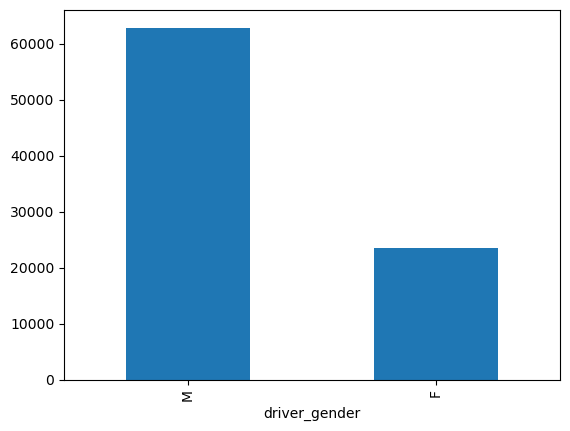

In [43]:
df.driver_gender.value_counts().plot.bar()
plt.show()

In [74]:
#find min max average for male and female drivers
df.groupby('driver_gender').driver_age.agg(['mean','min','max'])

,mean,min,max
driver_gender,,,
F,32.607399,15.0,99.0
M,34.537886,15.0,94.0


In [75]:
#check drug activity

drug_data=pd.DataFrame(df.groupby('driver_gender').drugs_related_stop.value_counts())
drug_data

count
driver_gender drugs_related_stop       
F             False               23415
              True                   96
M             False               62176
              True                  719

In [76]:
# extract true cases

df.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     96
M    719
Name: drugs_related_stop, dtype: int64

In [77]:
#total cases for true and false drugs_related_stop
df['drugs_related_stop'].value_counts()

drugs_related_stop
False    90926
True       815
Name: count, dtype: int64

In [78]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2025-10-19 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2025-10-19 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2025-10-19 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2025-10-19 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2025-10-19 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [79]:
#what type of action is taken by police for each date
df.groupby('stop_date').stop_outcome.value_counts()

stop_date   stop_outcome    
2005-01-02  Citation             1
2005-01-18  Citation             1
2005-01-23  Citation             1
2005-02-20  Arrest Driver        1
2005-03-14  Citation             1
                                ..
2015-12-30  N/D                  2
            Arrest Passenger     1
2015-12-31  Citation            16
            Warning              7
            No Action            1
Name: count, Length: 8970, dtype: int64

In [80]:
#how many times police have given warnings as stop_outcome

warning=df[df['stop_outcome']=='Warning']
warning

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,2005-10-03,2025-10-19 08:37:00,NaN,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,2005-10-03,2025-10-19 17:00:00,NaN,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,2005-10-06,2025-10-19 06:30:00,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,2005-10-09,2025-10-19 16:00:00,NaN,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,2005-10-10,2025-10-19 12:05:00,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91730,2015-12-31,2025-10-19 15:36:00,NaN,F,1996.0,19.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91732,2015-12-31,2025-10-19 19:44:00,NaN,F,1969.0,46.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91736,2015-12-31,2025-10-19 20:27:00,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,2025-10-19 20:35:00,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


In [81]:
#warning cases for value counts
warning.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome
F              Warning         1514
M              Warning         3779
Name: count, dtype: int64

In [82]:
#how many male and female for each violation 
pd.crosstab(df['driver_gender'],df['violation'],margins=True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,2487,3204,690,1013,635,15482,23511
M,8533,13020,3627,2419,2317,32979,62895
All,11020,16224,4317,3432,2952,48461,86406


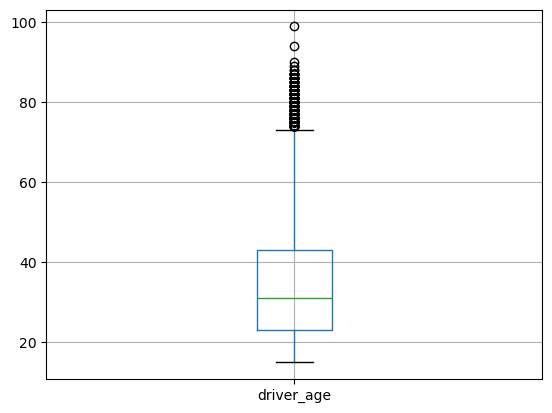

In [83]:
# data distribution visualization for driver_age
df.boxplot('driver_age')
plt.show()